Mounting Google Drive 

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Connecting to the folder which contains dataset

In [2]:
from PIL import Image
import os
path = '/content/drive/MyDrive/NLP/'
if os.path.exists(path):
    print('Directory exists')
else:
    print('Directory does not exist')

Directory exists


Loading the dataset into DataFrame

In [3]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/NLP/single_qna.csv")
print(df.head)

<bound method NDFrame.head of         QuestionType        Asin    AnswerTime      UnixTime  \
0             yes/no  B00004U9JP  Jun 27, 2014  1.403852e+09   
1         open-ended  B00004U9JP  Apr 28, 2014  1.398668e+09   
2             yes/no  B00004U9JP  Aug 25, 2014  1.408950e+09   
3             yes/no  B00004U9JP   Nov 3, 2014  1.415002e+09   
4         open-ended  B00004U9JP  Jun 21, 2014  1.403334e+09   
...              ...         ...           ...           ...   
1396891       yes/no  B00KGGJPYA  Nov 26, 2014  1.416989e+09   
1396892       yes/no  B00KGGJPYA  Oct 19, 2014  1.413702e+09   
1396893   open-ended  B00KGGJPYA  Oct 15, 2014  1.413356e+09   
1396894       yes/no  B00KGGJPYA  Jul 15, 2014  1.405408e+09   
1396895   open-ended  B00KGGJPYA   Jul 7, 2014  1.404716e+09   

                                                  Question AnswerType  \
0        I have a 9 year old Badger 1 that needs replac...          ?   
1                                             model num

Finding Unique Categories and mapping them to dictionary

In [4]:
uniqueCatagerioes=list(df['Category'].unique())
categories={}
for i,cat in enumerate(list(df['Category'].unique())):
  categories.update({cat:i})

print(categories)


{'Appliances': 0, 'Arts Crafts and Sewing': 1, 'Automotive': 2, 'Baby': 3, 'Beauty': 4, 'Cell Phones and Accessories': 5, 'Clothing Shoes and Jewelry': 6, 'Electronics': 7, 'Grocery and Gourmet Food': 8, 'Health and Personal Care': 9, 'Home and Kitchen': 10, 'Industrial and Scientific': 11, 'Musical Instruments': 12, 'Office Products': 13, 'Patio Lawn and Garden': 14, 'Pet Supplies': 15, 'Software': 16, 'Sports and Outdoors': 17, 'Tools and Home Improvement': 18, 'Toys and Games': 19, 'Video Games': 20}


Displaying number of questions Category-wise 

In [5]:
df[['Question','Category']].groupby(['Category']).count()

,Question
Category,
Appliances,9011
Arts Crafts and Sewing,21262
Automotive,89923
Baby,28933
Beauty,42422
Cell Phones and Accessories,85865
Clothing Shoes and Jewelry,22068
Electronics,314263
Grocery and Gourmet Food,19538


Bar Graph for  Classes vs Number of Records in each class




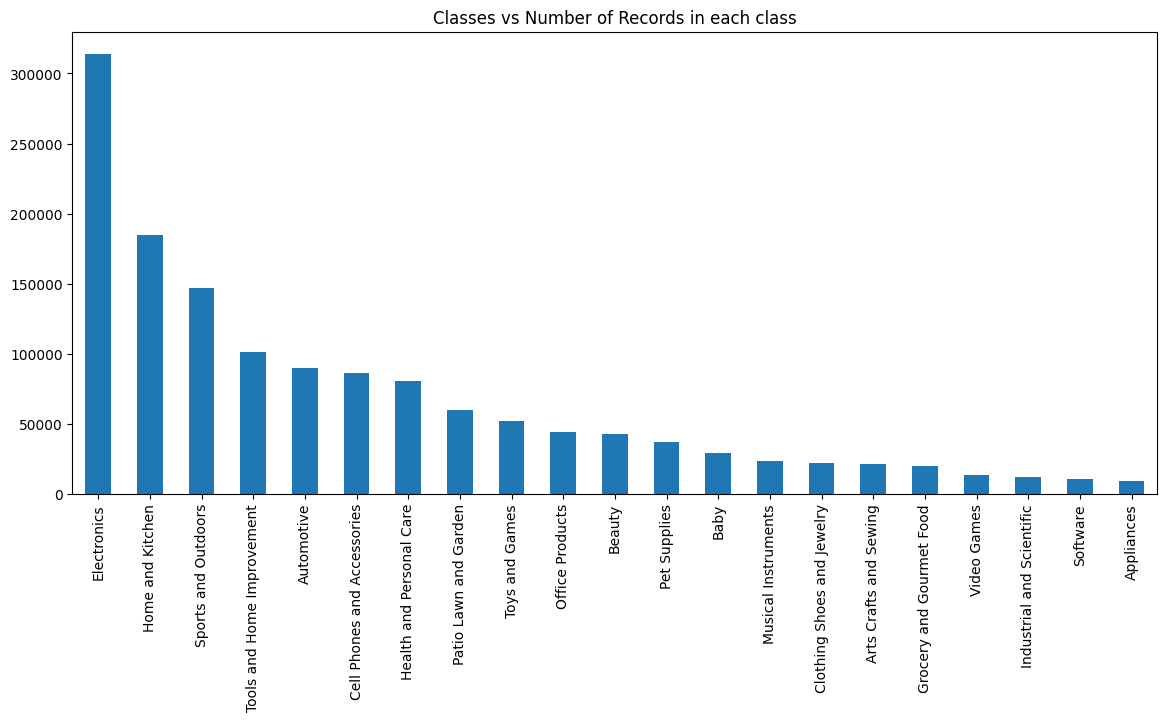

In [6]:
ax = df['Category'].value_counts().plot.bar(figsize=(14,6),title="Classes vs Number of Records in each class")

Converting category into lables 

In [7]:
df['labels'] = df['Category'].apply(categories.get)

In [8]:
df.head()

,QuestionType,Asin,AnswerTime,UnixTime,Question,AnswerType,Answer,Category,labels
0,yes/no,B00004U9JP,"Jun 27, 2014",1.403852e+09,I have a 9 year old Badger 1 that needs replac...,?,I replaced my old one with this without a hitch.,Appliances,0
1,open-ended,B00004U9JP,"Apr 28, 2014",1.398668e+09,model number,NaN,This may help InSinkErator Model BADGER-1: Bad...,Appliances,0
2,yes/no,B00004U9JP,"Aug 25, 2014",1.408950e+09,can I replace Badger 1 1/3 with a Badger 5 1/2...,?,Plumbing connections will vary with different ...,Appliances,0
3,yes/no,B00004U9JP,"Nov 3, 2014",1.415002e+09,Does this come with power cord and dishwasher ...,?,It does not come with a power cord. It does co...,Appliances,0
4,open-ended,B00004U9JP,"Jun 21, 2014",1.403334e+09,loud noise inside when turned on. sounds like ...,NaN,Check if you dropped something inside.Usually ...,Appliances,0


Selecting 1000 records for each category and creating a new dataframe

In [9]:
import pandas as pd

# Assuming you have a dataframe called 'df' with a column 'category'

# Select the list of 20 categories you want to filter
selected_categories = uniqueCatagerioes

# Create an empty dataframe to store the selected rows
dataset = pd.DataFrame()

# Iterate over each category
for category in selected_categories:
    # Filter the dataframe based on the current category and select the first 1000 rows
    category_rows = df[df['Category'] == category].head(3000)
    # Append the selected rows for the current category to the 'selected_rows' dataframe
    dataset = dataset.append(category_rows)

# Now 'selected_rows' contains the first 1000 rows for each of the 20 categories
dataset

<ipython-input-9-96dd0b7d473f>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(category_rows)
<ipython-input-9-96dd0b7d473f>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(category_rows)
<ipython-input-9-96dd0b7d473f>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(category_rows)
<ipython-input-9-96dd0b7d473f>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(category_rows)
<ipython-input-9-96dd0b7d473f>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

,QuestionType,Asin,AnswerTime,UnixTime,Question,AnswerType,Answer,Category,labels
0,yes/no,B00004U9JP,"Jun 27, 2014",1.403852e+09,I have a 9 year old Badger 1 that needs replac...,?,I replaced my old one with this without a hitch.,Appliances,0
1,open-ended,B00004U9JP,"Apr 28, 2014",1.398668e+09,model number,NaN,This may help InSinkErator Model BADGER-1: Bad...,Appliances,0
2,yes/no,B00004U9JP,"Aug 25, 2014",1.408950e+09,can I replace Badger 1 1/3 with a Badger 5 1/2...,?,Plumbing connections will vary with different ...,Appliances,0
3,yes/no,B00004U9JP,"Nov 3, 2014",1.415002e+09,Does this come with power cord and dishwasher ...,?,It does not come with a power cord. It does co...,Appliances,0
4,open-ended,B00004U9JP,"Jun 21, 2014",1.403334e+09,loud noise inside when turned on. sounds like ...,NaN,Check if you dropped something inside.Usually ...,Appliances,0
...,...,...,...,...,...,...,...,...,...
1386584,open-ended,B003CYKCHW,"Mar 30, 2014",1.396163e+09,"Why is this ""Item Under Review""? Quick questio...",NaN,Why is this item under review,Video Games,20
1386585,open-ended,B003CYKCHW,"Jul 1, 2012",1.341126e+09,Possibly lost a part while configuring my RAT7...,NaN,It was probably just the other black piece tha...,Video Games,20
1386586,open-ended,B003CYKCHW,"Jul 1, 2012",1.341126e+09,R.A.T. 5 button question??? can i customize wh...,NaN,If it's like the RAT 7 you can,Video Games,20
1386587,open-ended,B003CYKCHW,"Dec 18, 2011",1.324195e+09,Scroll wheel properties: I would like to know ...,NaN,old post but it does have clicks between each ...,Video Games,20


Creating a new dataframe that contains questions and lables only

In [10]:
colums=['Question','labels']
df1 = dataset[colums]
df1

,Question,labels
0,I have a 9 year old Badger 1 that needs replac...,0
1,model number,0
2,can I replace Badger 1 1/3 with a Badger 5 1/2...,0
3,Does this come with power cord and dishwasher ...,0
4,loud noise inside when turned on. sounds like ...,0
...,...,...
1386584,"Why is this ""Item Under Review""? Quick questio...",20
1386585,Possibly lost a part while configuring my RAT7...,20
1386586,R.A.T. 5 button question??? can i customize wh...,20
1386587,Scroll wheel properties: I would like to know ...,20


Spliting the dataset into train data and test data

In [11]:
from sklearn.model_selection import train_test_split
# Assuming you have a dataframe called 'data' with 'text' and 'label' columns

# Split the data into training and validation sets
train_data, val_data = train_test_split(df1, test_size=0.2, random_state=42)


In [12]:
train_data.head

<bound method NDFrame.head of                                                   Question  labels
913347   Will this work with the pivoting mount include...      12
979183             How are the bags attached to the frame?      14
194513   Does it works with Veer and Pre 3? I intend to...       5
1039503       Is this a pair of cross ties or sold as one?      15
120202   I have the same question. Can someone answer m...       3
...                                                    ...     ...
1386159  Can this mouse be configured with the Logitech...      20
912514          Does this mute work with a 3/4 size cello?      12
860      can anyone tell me how to attach to 3/8 water ...       0
192346   Now where do I get this? Now that the statues ...       5
1233437  What is the inner diameter of the openong? 4" ...      18

[50400 rows x 2 columns]>

Installing transformers

In [13]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 56.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 99.7 MB/s eta 0:00:00


Training bert-base-uncased model for category detection using user quries

In [14]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset

# Load the pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=len(uniqueCatagerioes))

# Prepare your training data
train_texts = list(train_data['Question'])
train_labels = list(train_data['labels']) # Intent labels corresponding to the sentences

# Tokenize the training texts
train_encodings = tokenizer(train_texts, truncation=True, padding=True)

# Convert the tokenized inputs to PyTorch tensors
train_input_ids = torch.tensor(train_encodings['input_ids'])
train_attention_mask = torch.tensor(train_encodings['attention_mask'])
train_labels = torch.tensor(train_labels)

# Create a PyTorch dataset
train_dataset = TensorDataset(train_input_ids, train_attention_mask, train_labels)

# Create a PyTorch DataLoader
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Fine-tune the BERT model
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
loss = torch.nn.CrossEntropyLoss()
num_epochs = 10

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for batch in train_loader:
        batch = [item.to(device) for item in batch]
        input_ids, attention_mask, labels = batch

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        logits = outputs.logits
        batch_loss = loss(logits, labels)
        batch_loss.backward()
        optimizer.step()

        total_loss += batch_loss.item()

    print(f"Epoch {epoch+1} - Loss: {total_loss / len(train_loader):.4f}")

# Perform inference on new sentences
test_texts =  list(val_data['Question'])
test_encodings = tokenizer(test_texts, truncation=True, padding=True)

# Convert the tokenized inputs to PyTorch tensors
test_input_ids = torch.tensor(test_encodings['input_ids'])
test_attention_mask = torch.tensor(test_encodings['attention_mask'])

# Create a PyTorch dataset
test_dataset = TensorDataset(test_input_ids, test_attention_mask)

# Create a PyTorch DataLoader
test_loader = DataLoader(test_dataset, batch_size=batch_size)

model.eval()
predictions = []

for batch in test_loader:
    batch = [item.to(device) for item in batch]
    input_ids, attention_mask = batch

    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits

    _, predicted_labels = torch.max(logits, dim=1)
    predictions.extend(predicted_labels.cpu().tolist())

# Convert the predicted labels to intents
# predicted_intents = [label_map[label] for label in predictions]

predicted_intents = [label for label in predictions]


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Epoch 1 - Loss: 1.9704
Epoch 2 - Loss: 1.3964
Epoch 3 - Loss: 1.0827
Epoch 4 - Loss: 0.8379
Epoch 5 - Loss: 0.6297
Epoch 6 - Loss: 0.4721
Epoch 7 - Loss: 0.3618
Epoch 8 - Loss: 0.2851
Epoch 9 - Loss: 0.2376
Epoch 10 - Loss: 0.1993


In [19]:
val_data.head()

,Question,labels
1085343,I have a 23' Fish Master boat with a Sisuki 25...,17
10159,Can I use it for airbrushing cakes?,1
979980,can this be used on a glass top range?,14
936525,Can you adjust ringer volume and turn off ringer?,13
614773,I don't see the list of ingredients. I'd like ...,8


Calculating the accuracy 

In [20]:
list1 = predicted_intents
list2 = list(val_data['labels'])

# Method 1: Using a loop
count_correct = 0
for elem1, elem2 in zip(list1, list2):
    if elem1 == elem2:
        count_correct += 1

print("Number of correct elements:", count_correct)

print(count_correct/len(list2))

Number of correct elements: 7450
0.5912698412698413


In [21]:
print("Accuracy", count_correct/len(list2))

Accuracy 0.5912698412698413


Calculating the Precision, recall and F1 Score

In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Example predicted labels and true labels for a multiclass intent detection
predicted_labels = predicted_intents
true_labels = list(val_data['labels'])  



average = 'macro'
precision_macro = precision_score(true_labels, predicted_labels, average=average)
recall_macro = recall_score(true_labels, predicted_labels, average=average)
f1_macro = f1_score(true_labels, predicted_labels, average=average)




print(" Precision:", precision_macro)
print(" Recall:", recall_macro)
print(" F1 Score:", f1_macro)


 Precision: 0.6026606115376923
 Recall: 0.5913077774717389
 F1 Score: 0.5931946961148574
